___
# <center> Singular Value Decomposition (SVD)
___

### <center> Linear Projection
___
#### <center> Projection equation:
$$ (b-a\beta)$$

- $\beta$ is our scaler and the point is that we want a scaled version of this line to be as close to b without leaving the line. Therefore, the closest point would be where $b$ meets $a$ at a 90 degree angle.

___
#### <center> If **b** is orthogonal/perpendicular to **$a\beta$** we know that their dot prodict must equal zero:
    
    
$$ a^{T}(b-a\beta) = 0$$
    
    
$$ a^{T}b - a^{T}a\beta = 0$$
    
    
$$ a^{T}a\beta = a^{T}b $$
___
#### <center> Because we are dealing with dot products of vectors we can divide them (cannot divide matrices):

$$ \beta = \frac{a^{T}b}{a^{T}a} $$


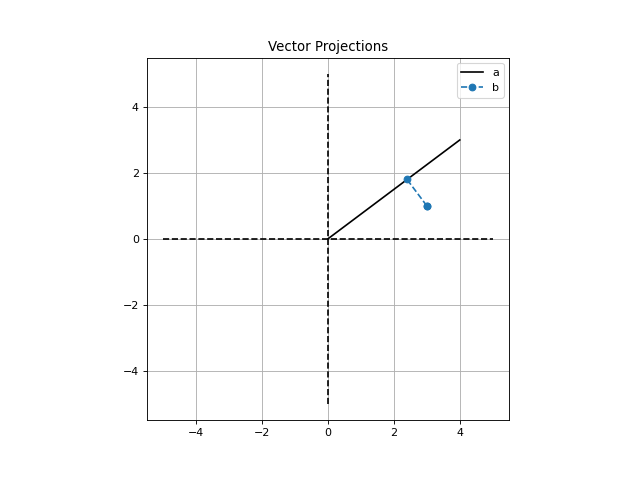

In [4]:
Image('VecProj.png')

___
#### <center> Left Inverse
For the equation $Ax = b$ if matrix A is not square but it is a tall skinny full column rank matrix we can take its left inverse. In order to make A equal the identity matrix we do the following:

$$A = \begin{pmatrix}
   \vdots \vdots\\
  \vdots \vdots\\
  \vdots \vdots\\
  \\
 \end{pmatrix}_{mxn}
 = (A^{T}A) = \begin{pmatrix}
   \vdots \vdots\vdots\vdots\\
  \vdots \vdots\vdots\vdots\\
  \vdots \vdots\vdots\vdots\\
 \end{pmatrix}_{nxn}$$
$$$$
- $A^{T}A$ is invertable so we take the left inverse $(A^{T}A)^{-1}$ while placing it on the left and the equation below provides the Indentity matrix
$$$$
$$(A^{T}A)^{-1} (A^{T}A) = I$$
___
## <center> Projection onto a subspace
#### <center> Projection equation:
$$ A^{T}(b-Ax) = 0$$
    
    
$$ A^{T}b - A^{T}Ax = 0$$
    
    
$$ A^{T}Ax = A^{T}b $$
    
    
$$ A^{T}Ax = A^{T}b $$
___
#### <center> Now we cannot divide matrices but we can take the left inverse

$$ (A^{T}A)^{-1}A^{T}Ax = (A^{T}A)^{-1} A^{T}b $$
    
    
$$ x = (A^{T}A)^{-1} A^{T}b $$

    
$$  = (A^{T}A)^{-1} A^{T}b $$

    
$$\hat{\theta} = (X^TX)^{-1}X^{T}y$$
$$$$
<center> Therefore, our closed-form solution is the projection of our points onto a n-dimentional hyperplane
    
___

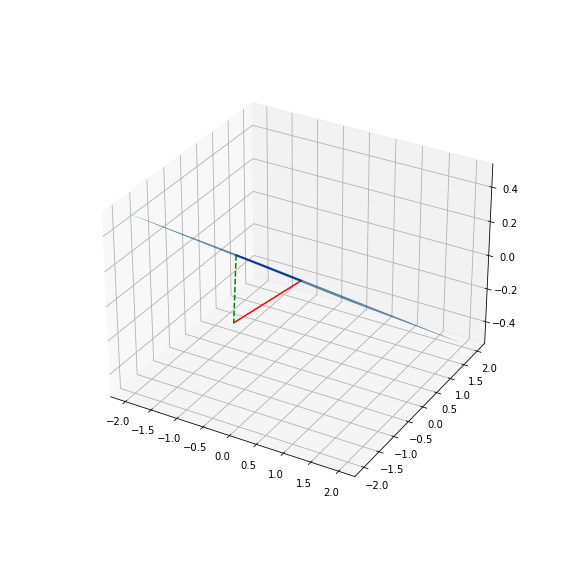

In [5]:
Image('Projection3Dimentional.png')

___
# <center> Matrix Decomposition
$$A = CR$$
    
$$A = LU$$ 
    
$$ A = QR$$
    
$$A = V \Lambda V^{-1}$$
    
$$S = Q \Lambda Q^{T}$$
    
$$A = U \Sigma V^{T}$$
___
#### <center> Orthonormal means unit length and orthogonal denoted as $Q$
    
$$Q^{-1} = Q^{T}$$
    
$$QQ^{-1} = QQ^{T} = Q^{-1}Q = Q^{T}Q$$
    
___

# <center> Singular Value Decomposition (SVD)

- Decompositing our X matrix and represent it as a product of three differnet matrices
  
  
- Normally the starting point for data reduction  
  
  
- Use it to solve linear systems of equation $Ax = b$ for non-square $A$ matrices  
  
  
- Basis for Principal component analysis
___
$$\overline{\underline{X}} = \begin{bmatrix}
        \vdots & \vdots  & \cdots &\vdots           \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots           \\[0.3em]
       x_1 & x_2    & \cdots       & x_m \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots 
     \end{bmatrix}_{mxn} = U \Sigma V^{T} =  \begin{bmatrix}
       \vdots & \vdots  & \cdots &\vdots           \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots           \\[0.3em]
       u_1 & u_2    & \cdots       & u_n \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots
     \end{bmatrix} _{nxn} = \begin{bmatrix}
       \sigma_1 &   &            \\[0.3em]
       & \ddots    &    \\[0.3em]
       & & \sigma_m\\[0.3em]
       \hline
       & 0 
     \end{bmatrix} _{nxm} = \begin{bmatrix}
       \vdots & \vdots  & \cdots &\vdots           \\[0.3em]
       v_1 & v_2  & \cdots &v_m           \\[0.3em]
       \vdots & \vdots  & \cdots &\vdots    
     \end{bmatrix} _{mxm} $$
___
- $U$ forms the orthonormal basis of the column space of $\overline{\underline{X}}$ and is hierarchically ordered by importance in terms of their ability to describe the variance in the columns of $\overline{\underline{X}}$. It is comprised of the eigenvalues of $\overline{\underline{X}}\overline{\underline{X}}^{T}$.


- $\Sigma$ is a diagonal matrix that is hierarchically ordered eigenvalues. Symetric and positive definite meaning we will have n postive real eigenvalues


- $V$ forms the orthonormal basis of the row space of $\overline{\underline{X}}$ and is hierarchically ordered. It provides the eigen mixture of $U$ that adds up to $\overline{\underline{X}}$ scaled by $\Sigma$. It is comprised of the eigenvalues of $\overline{\underline{X}}^{T}\overline{\underline{X}}$.
___
#### <center> Important to know:  

$$UU^{T} = U^{T}U = I$$
  
$$VV^{T} = V^{T}V = I$$
___

#### <center> We can represent the matrix products of our three matrices as a sum of rank 1 matrices:

$$= \sigma_1 u_1 v^{T}_1 + \sigma_2 u_2 v^{T}_2 + \cdots + \sigma_m u_m v^{T}_m + 0$$
___
#### <center> Below is our best rank 1 approximation of $\overline{\underline{X}}$ 
$$\sigma_1 \begin{bmatrix}
        \vdots \\[0.1em]
       \vdots\\[0.1em]
       u_1\\[0.1em]
       \vdots
     \end{bmatrix} \begin{bmatrix}
        \cdots &  \cdots & v^{T}_1 & \cdots\\
     \end{bmatrix}$$

___ 

- There are only $m$ non-zero singular values $\Sigma$ because $\overline{\underline{X}}$ can only have atmost rank m  
  
  
- This means we can just select the first m columns of $U$, $mxm$ block of $\Sigma$ and $nxm$ V  
___  
  
$$\overline{\underline{X}} = U \Sigma V^{T} = \hat{U} \hat{\Sigma} V^{T}$$
___
- Where $ \hat{U} \hat{\Sigma} V^{T}$ is just the first $m$ columns. This is called the **economy SVD**  
  
  
- We are assuming tall skinny matrix


___
### <center>  Truncation
- Additionally we can truncate at r (throw away all the low energy $\sigma$ values)  
  
  
- Only keeping the first $r$ columns of $U$ and $r$ columns of $V$ and a $rxr$ submatrix of $\Sigma$ 
___
$$\approx \tilde{U} \tilde{\Sigma} \tilde{V}^{T}$$
___
- This is the best rank r approximation of $\overline{\underline{X}}$
___
#### <center> Very Important that after truncation:
$$\tilde{U}^{T}\tilde{U} = I$$
$$\tilde{U}\tilde{U}^{T} \neq I$$



___
# <center>  Dominant Correllations
#### <center> This is our correllation matrix among the columns of $\overline{\underline{X}}$
$$\overline{\underline{X}}^{T}\overline{\underline{X}} = \begin{bmatrix}
        \cdots & \cdots & x^{T}_1 & \cdots & \cdots  \\[0.1em]
       \cdots & \cdots & x^{T}_2 & \cdots & \cdots  \\[0.1em]
       & &\vdots & &   
     \end{bmatrix} \begin{bmatrix}
        \vdots &  \vdots & \vdots\\
        \vdots &  \vdots & \vdots\\
        x_1 & x_2 & \cdots \\
        \vdots & \vdots  & \vdots\\
        \vdots & \vdots  & \vdots\\
     \end{bmatrix}$$
     
$$ = \begin{bmatrix}
        x^{T}_1x_1 &  x^{T}_1x_2 & \cdots & x^{T}_1x_m\\
        x^{T}_0x_1 &  x^{T}_2x_2 & \cdots & x^{T}_2x_m\\
        \vdots & \vdots & \ddots &\vdots \\
        x^{T}_mx_1 &  x^{T}_mx_2 & \cdots & x^{T}_mx_m
     \end{bmatrix} $$
$$$$     
$$x^{T}_i x_j = \langle x_i,x_j \rangle$$
___
- Every entry is just the inner product of the corresponding two columns of $\overline{\underline{X}}$  
  
  
- The larger the inner product the more similar  
  
  
- Small inner product means the columns are nearly orthogonal and different  
  
  
- Since $\overline{\underline{X}}^{T}\overline{\underline{X}}$ is symmetric and positive semi-defininte because they are inner products: we will have non-negative real eigenvalues
___

## <center>  Finding $U \Sigma V$ for the economy SVD
$$\overline{\underline{X}}^{T} = V \hat{\Sigma} \hat{U}^{T}$$

$$\overline{\underline{X}}^{T}\overline{\underline{X}} = V \hat{\Sigma} \hat{U}^{T} \hat{U} \hat{\Sigma} V^{T} = V \hat{\Sigma}^{2} V^{T}$$
___
- This is the expression for the eigendecomposition of our correllation matrix  
  
  
- Where $\Sigma$ are our eigenvalues of our correllation matrix and $\Sigma$ and $V$ are our eigenvectors from our correllation matrix
___
#### <center> Intuition (Computing SVD this way is inefficent but this is a good guide to understanding)

- The right singular values for $V$ are the eigenvectors of the columnwise correllation matrix  
  
  
- $\Sigma$ are the square roots of the same eigenvalues of the columnwise correllation matrix
___
$$\overline{\underline{X}}\overline{\underline{X}}^{T} = \hat{U} \hat{\Sigma} V^{T}  \hat{\Sigma} \hat{U}^{T} = \hat{U} \hat{\Sigma}^{2} \hat{U}^{T}$$
___
- The left singular values for $U$ are the eigenvectors of the columnwise correllation matrix  
  
  
- $\Sigma$ are the same square roots of the same eigenvalues of the columnwise correllation matrix

___

# <center>  Pseudoinverse
#### <center> Solving linear systems where $A$ and $b$ are known
    
$$Ax = b$$
    
    
$$A^{-1}Ax = A^{-1}b$$
    
    
$$x = A^{-1}b$$

- This only works where $A$ is a square and invertable matrix
- SVD allows us to generalise to non-sqaure $A$ matrices
___
## <center> Two common forms of our $A$ Matrix:

#### <center> Short and Fat (Underdetermined)
$$\begin{bmatrix}
       & & & & & & \\[0.1em]
       & & A & & \\[0.1em]
       & &  & &  \\
       & & & & & \\[0.1em]
     \end{bmatrix} \begin{bmatrix}
        \\[0.01em]
        \\[0.01em]
         \\[0.01em]
        \\[0.01em]
        x\\
        \\
        \\
        \\
        \\
     \end{bmatrix} = \begin{bmatrix}
        \\
        b\\
        \\
        \\
     \end{bmatrix}$$
- There is not enough measurements in b to uniquely determine a single unique solution x
- Therefore, there will be $\infty$ many solution x given b
___
#### <center> Tall and Skinny (Overderdetermined)
$$\begin{bmatrix}
        & & & &  \\[0.1em]
       & & A &  \\[0.1em]
       & & & &  \\
       & & & &  \\[0.1em]
       & & & &  \\
       & & & &  \\
       & & & & 
     \end{bmatrix} \begin{bmatrix}
        \\[0.01em]
        x
        \\
        \\
     \end{bmatrix} = \begin{bmatrix}
        \\
        b\\
        \\
        \\
        \\
        \\
         \\
     \end{bmatrix}$$
- There will be zero solution in general for x given b

___
#### <center> Moore Penrose Pseudoinverse (showing left pseudoinverse)
SVD will allow us to approximatly inverse this $A$ matrix (pseudoinverse) and find a best fit x that comes close to solve this equation or solves the equation with the min $\| x \|_2$.
#### <center> Assuming economy SVD
$$A = U \Sigma V^{T} = A^{\dagger} = V \Sigma^{-1} U^{T}$$

    
$$Ax = b$$

    
$$U \Sigma V^{T}x = b $$

    
$$V \Sigma^{-1} U^{T} U \Sigma V^{T}x = V \Sigma^{-1} U^{T}b $$

    
$$ \tilde{x} = V \Sigma^{-1} U^{T}b $$

    
$$ : = A^{\dagger}b $$

- Beacuse matrix $A$ is not square or full rank a proper inverse does not exist and the Moore Penrose Pseudoinverse is as close as we will get to inverting that $A$ matrix
___
#### Underdetermined:
- min $\| \hat{x} \|_2\text{ s.t }A\tilde{x} =b$ is given by the solution $ : = A^{\dagger}b $
- $ : = A^{\dagger}b $ is an actual solution for the underdetermined case


#### Overderdetermined:
- Least Squares solution
min $\|A\tilde{x}-b\|_2$
- $ A^{\dagger}b $ is the solution that minimises the error of $\|A\tilde{x}-b\|_2$
___
#### <center> To understand why $ : = A^{\dagger}b $ is not an exact solution:
    
$$A\tilde{x} = \hat{U} \hat{\Sigma} \hat{V}^{T}\hat{V} \hat{\Sigma}^{-1} \hat{U}^{T}b$$
    
    
$$\Sigma \Sigma^{-1} = I $$
    
    
$$V^{T}V= I $$
    
    
$$UU^{T} \neq I $$

$$ = \hat{U}\hat{U}^{T}b$$
___
- This is the equation for the projection of b onto the span of the columns of $\hat{U}$ which is equal to the span of the columns of $A$  
  
  
- $Ax = b$ can only be solved when b is in the col(A)  
  
  
- Therefore the best least squares solution $A\tilde{x}$ is taking b and projecting it onto the column of $A$
___
#### <center> Projection onto a subspace
#### <center> Remember the projection equation:
$$\hat{\theta} = X(X^TX)^{-1}X^{T}y$$

#### <center> If X is orthonormal the equation becomes $U(U^TU)^{-1}U^{T}y$

$$=(U^TU)^{-1} = (U^{-1}U) = I$$

$$ = UU^{T}y$$
$$$$
<center> $UU^{T}y$ is the orthonormal projection onto a subspace 


___

## <center>  The Best Fit $x$ (Best Fit Slope) to solve $Ax = b$
$$\tilde{x} = \frac{a^{T}b}{\|a\|_2}$$

- I wonder where we have seen this equation from (linear projections)
  
  
- $a^{T}b$ Taking all the b data and projecting into the direction  
  
  
- $ \frac{a^{T}b}{\|a\|_2}$ normailzing both vectors by its length
    
___

## <center> Python Implementation

```
def SVD(X,y):
    X_with_intercept = np.c_[np.ones((len(X))),X] #adding intercept 
    U, S, V = np.linalg.svd(X_with_intercept,full_matrices=False) #NB python svd returns V.T
    """pseudoinverse if underdetermined n<m (infinitely many solutions) or overdetermined n>m (no solution) 
            or if some features are redundant the pseudoinverse is always defined.pseudoinverse for Linear regression 
            Formula: V.T@np.linalg.inv(np.diag(S))@U.T@y """
    xtilde = V.T@(np.linalg.inv(np.diag(S)@np.diag(S)+self.penalty))@np.diag(S)@U.T@y # Ridge regression  
    """This formula uses Ridge Regression as a regularized version of Linreg adding a regularised term
    to the cost function"""
```

___
# <center> Appendix

**Libraries**:
```
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
```